<a href="https://colab.research.google.com/github/HWMV/AIFFEL_Quest1/blob/master/Machine_Learning/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Airbnb**

1. Baseline

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [181]:
# 데이터 셋 불러오기
url = 'https://raw.githubusercontent.com/HWMV/AIFFEL_Quest1/master/Machine_Learning/AB_NYC_2019.csv'
dataset = pd.read_csv(url)

# 가격 예측이니가 price를 타겟 컬럼
x = dataset.drop('price',axis=1)
y = dataset['price']

# 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

# price 컬럼이 없으니까 추가
x_train['price'] = y_train
x_test['price'] = y_test

2. EDA(탐색적 데이터 분석)

In [182]:
# 데이터 크기 확인
x_train.shape, x_test.shape

((39116, 16), (9779, 16))

In [183]:
# 데이터 샘플
display(x_train.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
34718,27528935,Private Room in Brooklyn,193502084,Linda,Brooklyn,Borough Park,40.63925,-74.00329,Private room,1,12,2019-03-23,1.16,8,0,40
4046,2563611,Apartment 6,1163315,Craig,Manhattan,Harlem,40.80290,-73.95694,Private room,3,298,2019-06-27,4.67,1,42,104


In [184]:
# 데이터 샘플
display(x_test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
42776,33216329,1 BR Suite in Midtown Manhattan,24831061,Hosteeva,Manhattan,Midtown,40.76453,-73.98035,Private room,1,0,NaN,NaN,8,0,250
30338,23453013,Studio Near Times Square,2416454,Gen,Manhattan,Hell's Kitchen,40.76000,-73.98962,Entire home/apt,3,4,2018-07-28,0.26,1,0,175


In [185]:
# 데이터 타입
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39116 entries, 34718 to 22041
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39100 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31103 non-null  object 
 12  reviews_per_month           

In [186]:
# 결측치 확인(train) :0이 아닌 것은 그만큼 결측치가 안 채워져 있다는 것
x_train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           16
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       8013
reviews_per_month                 8013
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [187]:
# 결측치 (test): 0이 아닌 것은 그만큼 결측치가 안 채워져 있다는 것
x_test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2039
reviews_per_month                 2039
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

<Axes: >

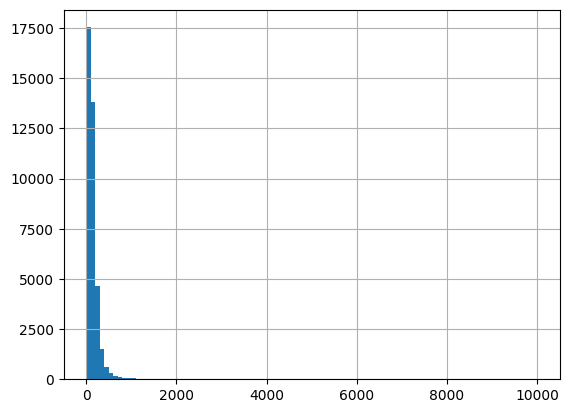

In [188]:
# target(hist)
x_train['price'].hist(bins=100)
# y_train.hist(bins=50)

In [189]:
# target(describe)
x_train['price'].describe()

count    39116.000000
mean       152.583930
std        241.157264
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [190]:
# 피처 (host_id)
x_train['host_id'].value_counts()

219517861    258
107434423    177
30283594      96
12243051      82
137358866     81
            ... 
14210435       1
262883761      1
20319948       1
211941129      1
120906241      1
Name: host_id, Length: 30890, dtype: int64

**3. 데이터 전처리**

In [191]:
# 샘플 확인
display(x_train.head(3))

# 필요없는 컬럼들 삭제
x_train = x_train.drop('last_review', axis=1)
x_test = x_test.drop('last_review', axis=1)

# 샘플 확인
display(x_train.head(3))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
34718,27528935,Private Room in Brooklyn,193502084,Linda,Brooklyn,Borough Park,40.63925,-74.00329,Private room,1,12,2019-03-23,1.16,8,0,40
4046,2563611,Apartment 6,1163315,Craig,Manhattan,Harlem,40.80290,-73.95694,Private room,3,298,2019-06-27,4.67,1,42,104
37841,29955544,Magnificent Loft with a Skyline view,4538731,Francois,Brooklyn,Greenpoint,40.73039,-73.95434,Entire home/apt,7,2,2019-04-15,0.32,1,20,270


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
34718,27528935,Private Room in Brooklyn,193502084,Linda,Brooklyn,Borough Park,40.63925,-74.00329,Private room,1,12,1.16,8,0,40
4046,2563611,Apartment 6,1163315,Craig,Manhattan,Harlem,40.80290,-73.95694,Private room,3,298,4.67,1,42,104
37841,29955544,Magnificent Loft with a Skyline view,4538731,Francois,Brooklyn,Greenpoint,40.73039,-73.95434,Entire home/apt,7,2,0.32,1,20,270


In [192]:
# 결측치 채우기 (Nah 0으로 채우기)
x_train['reviews_per_month'] = x_train['reviews_per_month'].fillna(0)
x_test['reviews_per_month'] = x_test['reviews_per_month'].fillna(0)

In [193]:
# 결측치 재확인
x_train.isnull().sum()

id                                 0
name                              12
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
price                              0
dtype: int64

In [194]:
# 가격 값 복사
target = x_train['price']
x_train = x_train.drop('price', axis=1)

In [195]:
# # 수치형 피처들 확인
# x_train.info

In [196]:
# 이건 연구좀 해보자..
# 수치형 피처 선택
# 수치형만 담을순 없나? 리스트 말고
# cols = x_train.columns[x_train.dtype.isin(['int64','float64'])]

cols = [
      'host_id',
      'latitude',
      'longitude',
      'minimum_nights',
      'number_of_reviews',
      'reviews_per_month',
      'calculated_host_listings_count',
      'availability_365'
]

x_train = x_train[cols]
x_test = x_test[cols]

**4. 검증 데이터 분리**

In [197]:
# 검증 데이터 분할
x_train, x_val, y_val_train, y_val = train_test_split(x_train, target, test_size=0.2, random_state=2023)

x_train.shape, x_val.shape, y_val_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

**5. 머신러닝**

In [198]:
# 머신러닝 (회귀 LinearRegresseion)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_val_train)
pred = model.predict(x_val)
mean_squared_error(y_val, pred)

54166.81336565637